# Importing Libaries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Un-Zip and Reading what's within the zip

In [12]:
with ZipFile('nyc-taxi-trip-duration.zip', 'r') as f:
    f.extractall()
    
#Confirming the 3 files required for the dataset
print(f.namelist())

['sample_submission.zip', 'test.zip', 'train.zip']


# Reading the test and train, checking contents

In [13]:
df_test = pd.read_csv("test.zip")
df_train = pd.read_csv("train.zip")

df_test.info()
var = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'diff_latitude', 'diff_longitude']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


# Removing outliers in trip_duration of our data set

In [14]:
Q1 = df_train['trip_duration'].quantile(0.25)
Q3 = df_train['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train_no_outliers = df_train[(df_train['trip_duration'] >= lower_bound) & (df_train['trip_duration'] <= upper_bound)]

In [15]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Seperated the train and test sets, compared the differences in order to see the correlation

In [16]:
train_Y = np.array(df_train['trip_duration'])
ids= df_test['id']
df_both = pd.concat([df_train,df_test])

df_train['diff_latitude'] = (df_train['dropoff_latitude'] - df_train['pickup_latitude']).abs()
df_train['diff_longitude'] = (df_train['dropoff_longitude'] - df_train['pickup_longitude']).abs()

df_test['diff_latitude'] = (df_test['dropoff_latitude'] - df_test['pickup_latitude']).abs()
df_test['diff_longitude'] = (df_test['dropoff_latitude'] - df_test['pickup_longitude']).abs()

var = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'diff_latitude', 'diff_longitude',]

df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,diff_latitude,diff_longitude
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.002335,0.017525
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.007412,0.019066
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.053852,0.026306
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.013252,0.002228
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.010689,0.000130


# Seperated the train and test sets, compared the differences in order to see the correlation


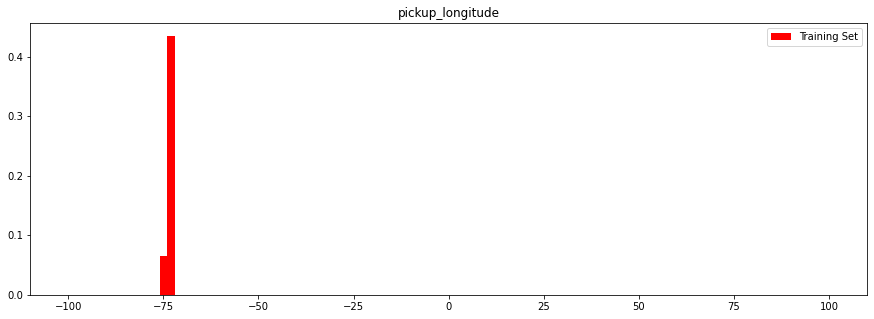

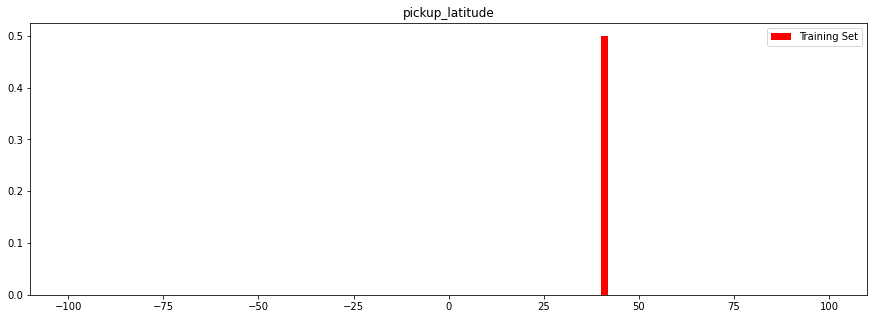

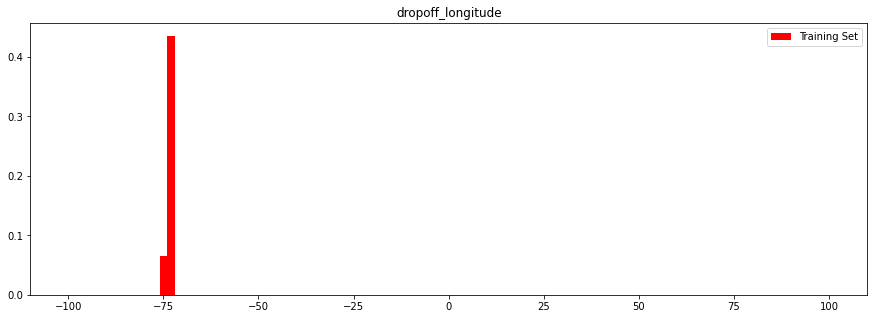

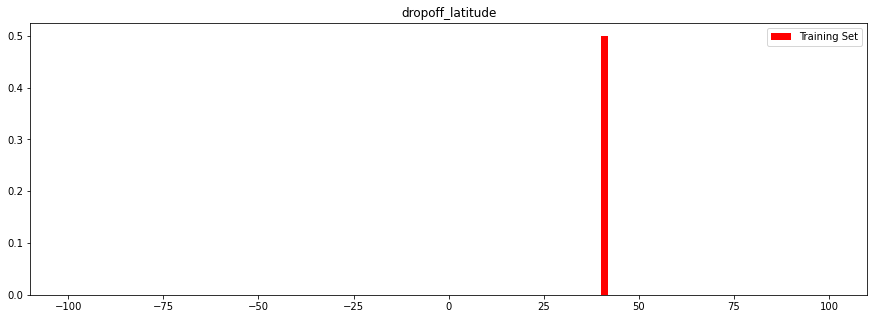

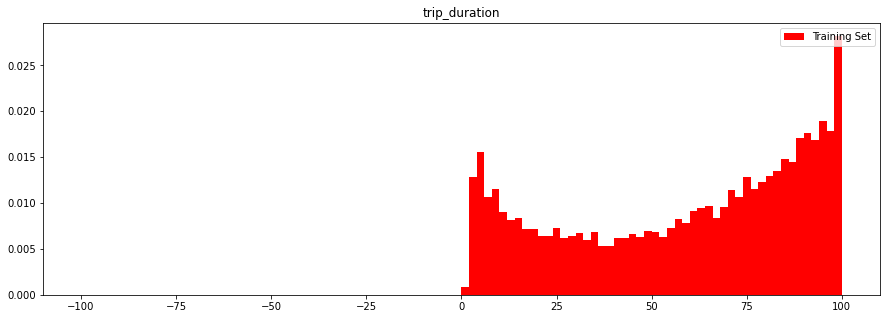

In [17]:
for variable in var[5:9] + [var[10]]:
    plt.figure(figsize=(15, 5))
    plt.hist(np.array(df_train[variable]), bins=100, range=(-100, 100), color="red", label="Training Set", density=1, stacked=True)
    plt.title(variable)
    plt.legend(loc='upper right')
    plt.show()

# From diff_longitude and diff_latitude, we are know plotting the visualization of the difference 


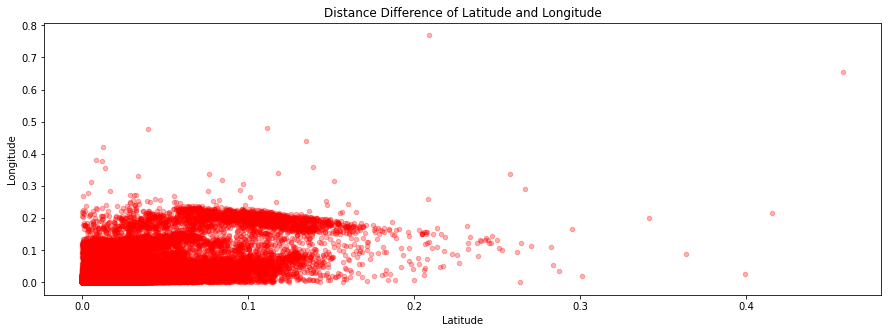

In [18]:
#Downsampling as the original sample contained too many datapoints that causes visualizations clumping 
#Sample size is large enough to still represent the sample 

sample_size = 100000
df_sample = df_train.sample(sample_size)

plt.figure(figsize=(15, 5))
plt.scatter(df_sample['diff_latitude'], df_sample['diff_longitude'], color="red", alpha=0.3, s=20)

plt.title("Distance Difference of Latitude and Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()


# Prediction Model using Linear Regression Model

In [19]:
df_train_no_outliers['diff_latitude'] = (df_train_no_outliers['dropoff_latitude'] - df_train_no_outliers['pickup_latitude']).abs()
df_train_no_outliers['diff_longitude'] = (df_train_no_outliers['dropoff_longitude'] - df_train_no_outliers['pickup_longitude']).abs()

# Continue with the rest of your code

features = ['diff_latitude', 'diff_longitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train_no_outliers[features], df_train_no_outliers['trip_duration'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
pred = model.predict(X_test_scaled)

# Adjust the predictions to fit within the range of trip durations in the training set
min_trip_duration_train = df_train_no_outliers['trip_duration'].min()
max_trip_duration_train = df_train_no_outliers['trip_duration'].max()
scaled_pred = (pred - pred.min()) / (pred.max() - pred.min())
scaled_pred = scaled_pred * (max_trip_duration_train - min_trip_duration_train) + min_trip_duration_train

# Scale the features of the test set
X_test_scaled_final = scaler.transform(df_test[features])

# Make predictions on the test set and adjust based on the range of trip durations in the training set
pred_test = model.predict(X_test_scaled_final)
scaled_pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
scaled_pred_test = scaled_pred_test * (max_trip_duration_train - min_trip_duration_train) + min_trip_duration_train

# Create a DataFrame with 'id' and adjusted predicted 'trip_duration'
sub = pd.DataFrame({'id': df_test['id'], 'trip_duration': scaled_pred_test})

/var/folders/5h/w8cyshhx6jn77xvy32pblprr0000gn/T/ipykernel_828/3927280333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_no_outliers['diff_latitude'] = (df_train_no_outliers['dropoff_latitude'] - df_train_no_outliers['pickup_latitude']).abs()
/var/folders/5h/w8cyshhx6jn77xvy32pblprr0000gn/T/ipykernel_828/3927280333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_no_outliers['diff_longitude'] = (df_train_no_outliers['dropoff_longitude'] - df_train_no_outliers['pickup_longitude']).a

# Printing Adjust Predictions DataFram and Linear Regression Model 

In [20]:
print("Adjusted Predictions:")
print(sub.head())

print("\nLinear Regression Model Coefficients:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Adjusted Predictions:
          id  trip_duration
0  id3004672     171.400119
1  id3505355     165.999606
2  id1217141     169.829462
3  id2150126     169.698459
4  id1598245     169.673065

Linear Regression Model Coefficients:
Coefficients: [148.10667376 159.48939471]
Intercept: 731.919070118524


# Printing Predicted Trip Duration According to ID

In [21]:
print(sub)

               id  trip_duration
0       id3004672     171.400119
1       id3505355     165.999606
2       id1217141     169.829462
3       id2150126     169.698459
4       id1598245     169.673065
...           ...            ...
625129  id3008929     170.289939
625130  id3700764     173.975672
625131  id2568735     169.721237
625132  id1384355     183.174172
625133  id0621643     173.021704

[625134 rows x 2 columns]


# Scatterplot of Actual vs Adjusted Predicted Trip Durations


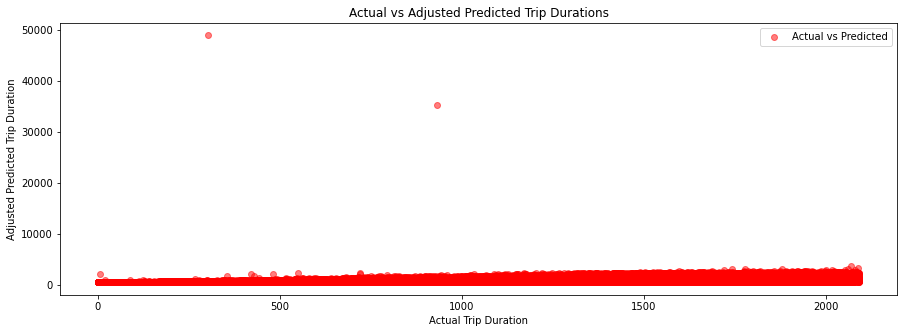

In [45]:
plt.figure(figsize=(15, 5))
plt.scatter(y_test, model.predict(X_test_scaled), color='red', label='Actual vs Predicted', alpha=0.5)
plt.title('Actual vs Adjusted Predicted Trip Durations')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Adjusted Predicted Trip Duration')
plt.legend()
plt.show()

# Evaluation Metric:
# Root Mean Squared Logarithmic Error 

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, scaled_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 844.328476416486


# Percantage of Perdictability 

In [63]:
y_pred = model.predict(X_test_scaled)
percentage_tolerance = 10
percentage_within_tolerance = np.mean(np.abs(y_pred - y_test) / y_test * 100 <= percentage_tolerance)

print(f'Percentage of predictions within {percentage_tolerance}% error: {percentage_within_tolerance * 100}%')


Percentage of predictions within 10% error: 15.638622532820484%
